## Make a energy use map
### Yixuan Tang

### EUI (Energy Use Intensity) Definition: Energy Use Intensity is a building's annual energy use per unit area. It is typically measured in thousands of BTU per square foot per year (kBTU/ft2/yr) or kWh/m2/yr

In [50]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import matplotlib.patches as mpatches

%matplotlib inline
from pandas import DataFrame

In [20]:
# download the data 

data_xls = pd.read_excel('http://www.nyc.gov/html/gbee/downloads/excel/2015_nyc_cy2014__ll84_disclosure_data.xlsx')
data_xls.to_csv('2015_nyc_cy2014__ll84_disclosure_data.csv', encoding= 'utf-8')
data = pd.read_csv('2015_nyc_cy2014__ll84_disclosure_data.csv')

In [21]:
data.head()

,Unnamed: 0,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions (MtCO2e),Direct GHG Emissions (MtCO2e),Indirect GHG Emissions (MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking) (ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,0,7365.0,1009970029,NaN,NaN,1022631,1155,AVENUE OF THE AMER,MANHATTAN,10036.0,...,No,None,90,3054.3,0,3054.3,686902,734668.0,Office,1.0
1,1,8139.0,1013150001,NaN,NaN,1037545,655,3 AVENUE,MANHATTAN,10017.0,...,No,None,86,2453.3,0,2453.3,384432,380000.0,Office,1.0
2,2,8604.0,1009990019,NaN,NaN,1022667,114,WEST 47 STREET,MANHATTAN,10036.0,...,No,None,84,2961.2,0,2961.2,572369,565000.0,Financial Office,1.0
3,3,8841.0,1013190047,NaN,NaN,1037596,733,3 AVENUE,MANHATTAN,10017.0,...,No,None,75,2731.4,0,2731.4,362578,405399.0,Office,1.0
4,4,11809.0,1009950005,NaN,NaN,1085682,1472,BROADWAY,MANHATTAN,10036.0,...,No,None,61,13661.8,2557.4,11104.4,1601977,1642675.0,Office,1.0


In [22]:
data.columns

Index([u'Unnamed: 0', u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'BBL on the Covered Buildings List',
       u'DOF Benchmarking Submission Status', u'Site EUI\n(kBtu/ft2)',
       u'Weather Normalized Site EUI\n(kBtu/ft2)', u'Source EUI\n(kBtu/ft2)',
       u'Weather Normalized Source EUI\n(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions\n(MtCO2e)',
       u'Direct GHG Emissions\n(MtCO2e)', u'Indirect GHG Emissions\n(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)\n(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings

In [23]:
data.shape

(13974, 27)

### data cleaning

In [24]:
data = data[data['Zip Code'].notnull()]
data.shape

(11614, 27)

In [25]:
type(data['Zip Code'])

pandas.core.series.Series

In [26]:
data = data[data['Site EUI\n(kBtu/ft2)'].notnull()]
data.shape

(11499, 27)

In [27]:
data['Site EUI\n(kBtu/ft2)']

0                   54
1                 85.3
2                 67.1
3                100.6
4                114.7
5                 97.7
6                 85.3
7                   93
8                132.9
9                100.6
10                66.1
11                78.8
12               110.8
13                53.2
14                56.9
15                63.1
16                80.6
17                46.3
18               115.1
19                91.5
20                41.1
21                77.1
22                77.7
23                79.9
24               511.9
25               441.4
26                84.3
27               107.6
28               154.9
29                 149
             ...      
11771             89.3
11772             98.9
11773            113.1
11774             46.7
11775            102.1
11776            137.5
11777             97.5
11778             48.3
11779            118.2
11780            192.5
11781            247.5
11782             70.6
11783      

In [28]:
data['Site EUI\n(kBtu/ft2)'] = pd.Series(data['Site EUI\n(kBtu/ft2)']).convert_objects(convert_numeric=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [29]:
data['Site EUI\n(kBtu/ft2)']

0           54.0
1           85.3
2           67.1
3          100.6
4          114.7
5           97.7
6           85.3
7           93.0
8          132.9
9          100.6
10          66.1
11          78.8
12         110.8
13          53.2
14          56.9
15          63.1
16          80.6
17          46.3
18         115.1
19          91.5
20          41.1
21          77.1
22          77.7
23          79.9
24         511.9
25         441.4
26          84.3
27         107.6
28         154.9
29         149.0
          ...   
11771       89.3
11772       98.9
11773      113.1
11774       46.7
11775      102.1
11776      137.5
11777       97.5
11778       48.3
11779      118.2
11780      192.5
11781      247.5
11782       70.6
11783       70.6
11784      147.9
11785      107.0
11786        9.5
11787        NaN
11788       77.0
11789       69.1
11790       52.4
11791    56825.6
11792       67.8
11793        4.3
11794       70.7
11795       31.4
11796       15.6
11797       33.3
11798       39

In [30]:
data = data.dropna(subset=['Site EUI\n(kBtu/ft2)'])
data.shape

(10604, 27)

In [32]:
data.columns

Index([u'Unnamed: 0', u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'BBL on the Covered Buildings List',
       u'DOF Benchmarking Submission Status', u'Site EUI\n(kBtu/ft2)',
       u'Weather Normalized Site EUI\n(kBtu/ft2)', u'Source EUI\n(kBtu/ft2)',
       u'Weather Normalized Source EUI\n(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions\n(MtCO2e)',
       u'Direct GHG Emissions\n(MtCO2e)', u'Indirect GHG Emissions\n(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)\n(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings

In [39]:
df = data[['Zip Code','Site EUI\n(kBtu/ft2)']]
df.columns = ['Zipcode', 'EUI']
df.head()

,Zipcode,EUI
0,10036.0,54.0
1,10017.0,85.3
2,10036.0,67.1
3,10017.0,100.6
4,10036.0,114.7


In [42]:
df = df.groupby('Zipcode').median()
df.reset_index(inplace = True)
df.head()

,Zipcode,EUI
0,10001.0,76.50
1,10002.0,95.50
2,10003.0,88.20
3,10004.0,99.80
4,10005.0,85.65


In [45]:
df.EUI.describe()

count    187.000000
mean      90.701604
std       29.224224
min        8.500000
25%       80.200000
50%       86.700000
75%       95.425000
max      263.200000
Name: EUI, dtype: float64

In [46]:
df['label'] = 0
a,b,c = df['EUI'].quantile([.25,.50,.75]).values

In [48]:
df.loc[df['EUI']< a,'label'] = 0
df.loc[(df['EUI'] >= a) & (df['EUI'] < b),'label'] = 1
df.loc[(df['EUI'] >= b) & (df['EUI'] < c),'label'] = 2
df.loc[df['EUI'] >= c,'label'] = 3

In [49]:
Eplot = pd.DataFrame([df['label'],df['Zipcode']]).T
Eplot.reset_index(inplace=True)
Eplot.drop(['index'],axis=1,inplace=True)

In [60]:
Eplot.Zipcode = Eplot.Zipcode.astype(int)
Eplot.label = Eplot.label.astype(int)

In [61]:
zipsf = shp.Reader('NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

### visualization

In [101]:
def plot_on_map(result,level):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'Zipcode']
        x[key]=result.loc[i,'label']
    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+2))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    ax.set_xticks([])
    ax.set_yticks([])
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))
            
    ax.axis('scaled')
    
    clum_num=len(result.loc[:,'label'].unique())

    handles = []
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label=level[t])
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.title("2014 NYC Site EUI (kBtu/ft_2) on Zip Code", weight = 'bold', fontsize = 19)
    plt.show()

In [102]:
percent = ['< %.2f'%a , '%.2f ~ %.2f'%(a,b) ,'%.2f ~ %.2f'%(b,c) , '> %.2f'%c]

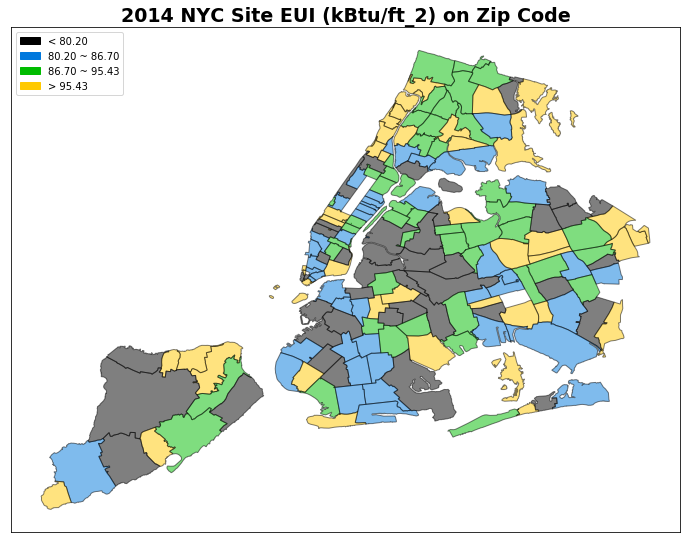

In [103]:
plot_on_map(Eplot,percent)

### Figure1. The energy use intensity in New York City 2014
#### The black color indicates in this zip code area, EUI is below 80.2 kBtu/ft2, which is the 25% of the entire city, the blue color indicates in this zip code area, EUI is between 80.2 - 86.7kBtu/ft2, which is in the 25% - 50% of the entire city, the green color indicates in this zip code area, EUI is between 86.7 - 95.43kBtu/ft2, which is in the 50% - 75% of the entire city, the yellow color indicates in this zip code area, EUI is over 95.43kBtu/ft2, which is over the 75% of the entire city.
